# Data Loading and Exploration

In [1]:
import sklearn
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

X = housing.data
y = housing.target

print("Feature names:", housing.feature_names)
print("Data shape:", X.shape)
print("Target shape:", y.shape)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Data shape: (20640, 8)
Target shape: (20640,)


In [3]:
data = housing.frame

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [8]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


# Data Visualization and Deeper Analysis

<Axes: ylabel='Frequency'>

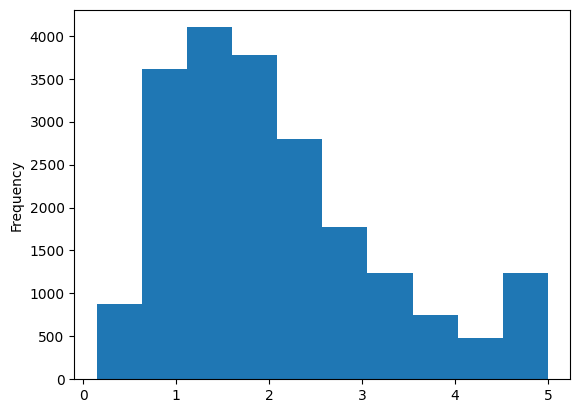

In [10]:
y.plot(kind='hist')

In [11]:
corr_matrix = data.corr(numeric_only=True)

<Axes: >

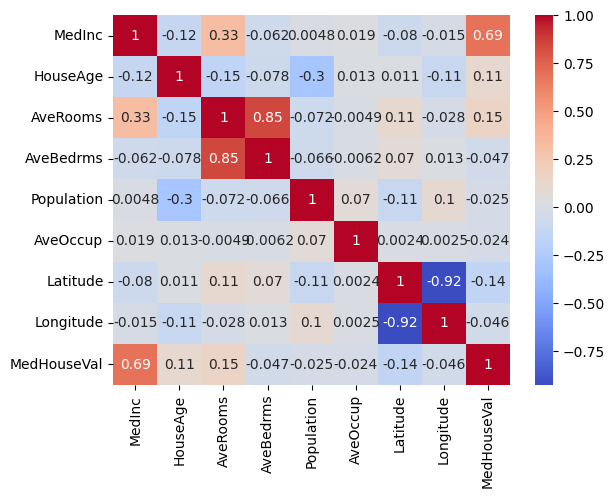

In [12]:
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True)

In [13]:
import matplotlib.pyplot as plt

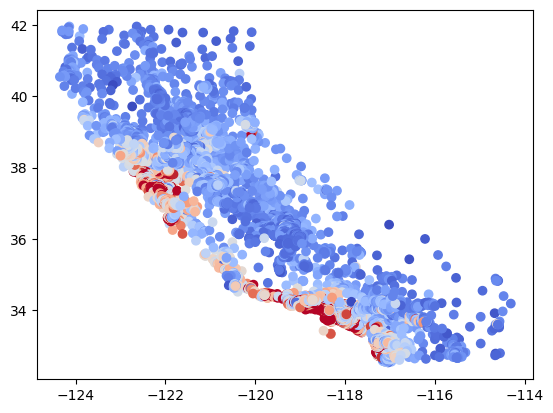

In [14]:
plt.scatter(data['Longitude'],data['Latitude'],c=data['MedHouseVal'],cmap='coolwarm')

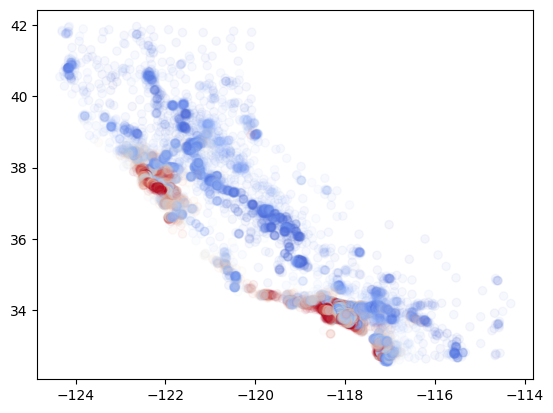

In [15]:
plt.scatter(data['Longitude'],data['Latitude'],c=data['MedHouseVal'],cmap='coolwarm',alpha=0.05)

# Data Preprocessing and Baseline Model

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("R² Score:", r2)

# Model Evaluation

In [20]:
evaluate_model(lin_model, X_test_scaled, y_test)

Mean Squared Error: 0.5558915986952442
R² Score: 0.575787706032451


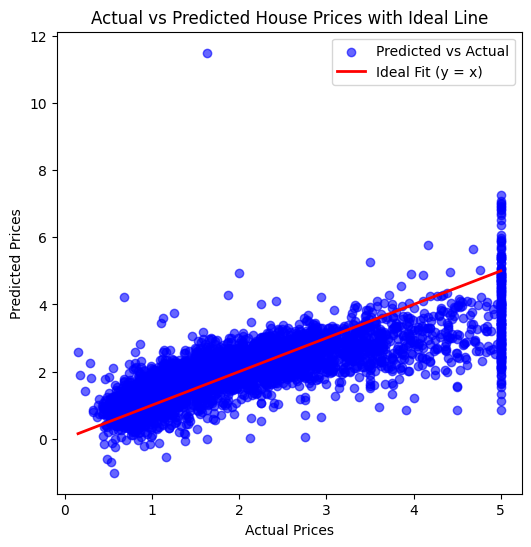

In [23]:
import numpy as np

y_pred = lin_model.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='red', lw=2, label='Ideal Fit (y = x)')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices with Ideal Line")
plt.legend()
plt.show()


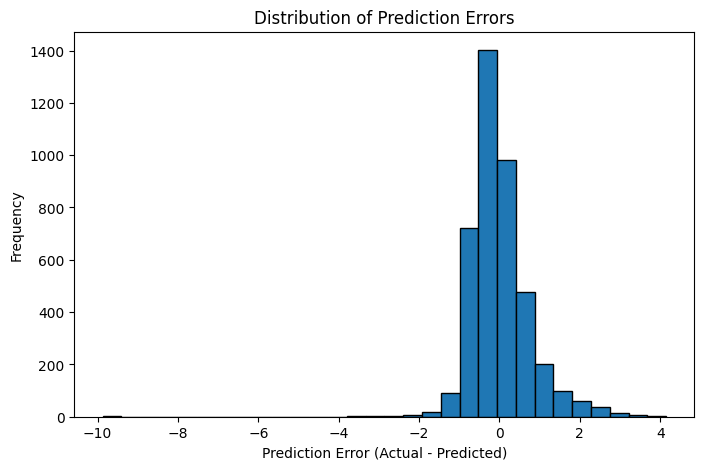

In [24]:
errors = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='k')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

# Model Improvement

In [25]:
from sklearn.ensemble import RandomForestRegressor

random_for_reg = RandomForestRegressor()
random_for_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [26]:
evaluate_model(random_for_reg, X_test_scaled, y_test)

Mean Squared Error: 0.25335130418770413
R² Score: 0.8066624173105069


In [27]:
random_for_reg.feature_importances_

array([0.52541645, 0.05474893, 0.04413961, 0.0292792 , 0.03089285,
       0.13797754, 0.08917827, 0.08836716])

In [28]:
for i in range(len(X.columns)):
    print(f"{X.columns[i]}: {random_for_reg.feature_importances_[i]}")

MedInc: 0.5254164490913873
HouseAge: 0.054748926082395316
AveRooms: 0.04413960913053356
AveBedrms: 0.02927919794464281
Population: 0.03089284523071438
AveOccup: 0.1379775448331436
Latitude: 0.08917827062866741
Longitude: 0.08836715705851574


In [29]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

param_grid = [
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    },
    {
        'regressor': [Lasso(max_iter=10000)],
        'regressor__alpha': [0.001, 0.01, 0.1, 1.0]
    },
    {
        'regressor': [RandomForestRegressor(random_state=42)],
        'regressor__n_estimators': [50, 100],
        'regressor__max_depth': [None, 10, 20]
    },
    {
        'regressor': [SVR()],
        'regressor__C': [0.1, 1, 10],
        'regressor__kernel': ['linear', 'rbf']
    },
    {
        'regressor': [GradientBoostingRegressor(random_state=42)],
        'regressor__n_estimators': [100, 200],
        'regressor__learning_rate': [0.05, 0.1, 0.2],
        'regressor__max_depth': [3, 5]
    }
]

grid_search = GridSearchCV(pipe,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best Model:", grid_search.best_estimator_)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation R²:", grid_search.best_score_)

best_model = grid_search.best_estimator_

evaluate_model(best_model, X_test, y_test)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(max_depth=5, n_estimators=200,
                                           random_state=42))])
Best Parameters: {'regressor': GradientBoostingRegressor(random_state=42), 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Best Cross-Validation R²: -0.4747644219900112
Mean Squared Error: 0.22436019293743492
R² Score: 0.8287861296260215
